<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb kuramatosivashinsky.do.txt  -->

# Demo - Kuramato-Sivashinsky equation
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **April 13, 2018**

**Summary.** This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to solve the time-dependent,
nonlinear Kuramato-Sivashinsky equation, in a doubly periodic domain. The demo is implemented in
a single Python file [KuramatoSivashinsky.py](https://github.com/spectralDNS/shenfun/blob/master/demo/Kuramato_Sivashinsky.py), and it may be run
in parallel using MPI.

<!-- dom:FIGURE: [https://rawgit.com/spectralDNS/spectralutilities/master/movies/Kuramato_movie_128.gif] Movie showing the evolution of the solution of the Kuramato-Sivashinsky equation. -->
<!-- begin figure -->

<img src="https://rawgit.com/spectralDNS/spectralutilities/master/movies/Kuramato_movie_128.gif" ><p style="font-size: 0.9em"><i>Figure 1: Movie showing the evolution of the solution of the Kuramato-Sivashinsky equation.</i></p>
<!-- end figure -->

## The Kuramato-Sivashinsky equation

The Kuramato-Sivashinsky (KS) equation is known for its chaotic bahaviour, and it is
often used in study of turbulence or turbulent combustion. We will here solve
the KS equation in a doubly periodic domain $\Omega=[-30\pi, 30\pi)^2$, starting from a
single Gaussian pulse

<!-- Equation labels as ordinary links -->
<a id="eq:ks"></a>

$$
\begin{equation}
\frac{\partial u(\boldsymbol{x},t)}{\partial t} + \nabla^2 u(\boldsymbol{x},t) + \nabla^4
u(\boldsymbol{x},t) + |\nabla u(\boldsymbol{x},t)|^2 = 0 \quad \text{for }\, \boldsymbol{x} \in \Omega
\label{eq:ks} \tag{1} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto1"></a>

$$
\begin{equation}  
u(\boldsymbol{x}, 0) = \exp(-0.01 \boldsymbol{x} \cdot \boldsymbol{x}) \notag
\label{_auto1} \tag{2}
\end{equation}
$$

## Spectral Galerkin method

<a id="sec:spectralgalerkin"></a>
The PDE in ([1](#eq:ks)) can be solved with many different
numerical methods. We will here use the [shenfun](https://github.com/spectralDNS/shenfun) software and this software makes use of
the spectral Galerkin method. Being a Galerkin method, we need to reshape the
governing equations into proper variational forms, and this is done by
multiplying  ([1](#eq:ks)) with the complex conjugate of a proper
test function and then integrating
over the domain. To this end we use testfunction $v\in W^N(\Omega)$, where $W^N(\Omega)$
is a suitable function space (defined in Eq. ([7](#eq:Wn))), and obtain

<!-- Equation labels as ordinary links -->
<a id="eq:du_var"></a>

$$
\begin{equation}
\frac{\partial}{\partial t} \int_{\Omega} u\, \overline{v}\, w \,dx = -\int_{\Omega}
\left(\nabla^2 u + \nabla^4 u \ + |\nabla u|^2 \right) \overline{v} \, w \,dx.
\label{eq:du_var} \tag{3}
\end{equation}
$$

Note that the overline is used to indicate a complex conjugate, whereas $w$
is a weight function. The function $u$
is now to be considered a trial function, and the integrals over the
domain are often referred to as inner products. With inner product notation

$$
\left(u, v\right) = \int_{\Omega} u \, \overline{v} \, w \, dx.
$$

the variational problem can be formulated as

<!-- Equation labels as ordinary links -->
<a id="eq:du_var2"></a>

$$
\begin{equation}
\frac{\partial}{\partial t} (u, v) = -\left(\nabla^2 u + \nabla^4 u + |\nabla u|^2,
v \right). \label{eq:du_var2} \tag{4}
\end{equation}
$$

The space and time discretizations are
still left open. There are numerous different approaches that one could take for
discretizing in time. Here we will use a fourth order exponential Runge-Kutta
method.

## Discretization

We discretize the model equation in space using continuously differentiable
Fourier basis functions

<!-- Equation labels as ordinary links -->
<a id="_auto2"></a>

$$
\begin{equation}
\phi_l(x) = e^{\imath \underline{l} x}, \quad -\infty < l < \infty,
\label{_auto2} \tag{5}
\end{equation}
$$

where $l$ is the wavenumber, and $\underline{l}=\frac{2\pi}{L}l$ is the scaled wavenumber, scaled with domain
length $L$ (here $60\pi$). Since we want to solve these equations on a computer, we need to choose
a finite number of test functions. A discrete function space $V^N$ can be defined as

<!-- Equation labels as ordinary links -->
<a id="eq:Vn"></a>

$$
\begin{equation}
V^N(x) = \text{span} \{\phi_l(x)\}_{l\in \boldsymbol{l}}, \label{eq:Vn} \tag{6}
\end{equation}
$$

where $N$ is chosen as an even positive integer and $\boldsymbol{l} = (-N/2,
-N/2+1, \ldots, N/2-1)$. And now, since $\Omega$ is a
two-dimensional domain, we can create a tensor product of two such one-dimensional
spaces:

<!-- Equation labels as ordinary links -->
<a id="eq:Wn"></a>

$$
\begin{equation}
W^{\boldsymbol{N}}(x, y) = V^N(x) \otimes V^N(y), \label{eq:Wn} \tag{7}
\end{equation}
$$

where $\boldsymbol{N} = (N, N)$. Obviously, it is not necessary to use the
same number ($N$) of basis functions for each direction, but it is done here
for simplicity. A 2D tensor product basis function is now defined as

<!-- Equation labels as ordinary links -->
<a id="_auto3"></a>

$$
\begin{equation}
\Phi_{lm}(x,y) = e^{\imath \underline{l} x} e^{\imath \underline{m} y}
= e^{\imath (\underline{l}x + \underline{m}y )},
\label{_auto3} \tag{8}
\end{equation}
$$

where the indices for $y$-direction are $\underline{m}=\frac{2\pi}{L}m$, and
$\boldsymbol{m}$ is the same set as $\boldsymbol{l}$ due to using the same number of basis functions for each direction. One
distinction, though, is that for the $y$-direction expansion coefficients are only stored for
$m=(0, 1, \ldots, N/2)$ due to Hermitian symmetry (real input data).

We now look for solutions of the form

<!-- Equation labels as ordinary links -->
<a id="_auto4"></a>

$$
\begin{equation}
u(x, y) = \sum_{l=-N/2}^{N/2-1}\sum_{m=-N/2}^{N/2-1}
\hat{u}_{lm} \Phi_{lm}(x,y).
\label{_auto4} \tag{9}
\end{equation}
$$

The expansion coefficients $\hat{u}_{lm}$ can be related directly to the solution $u(x,
y)$ using Fast Fourier Transforms (FFTs) if we are satisfied with obtaining
the solution in quadrature points corresponding to

<!-- Equation labels as ordinary links -->
<a id="_auto5"></a>

$$
\begin{equation}
 x_i = \frac{60 \pi i}{N}-30\pi \quad \forall \, i \in \boldsymbol{i},
\text{where}\, \boldsymbol{i}=(0,1,\ldots,N-1), 
\label{_auto5} \tag{10}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto6"></a>

$$
\begin{equation}  
 y_j = \frac{60 \pi j}{N}-30\pi \quad \forall \, j \in \boldsymbol{j},
\text{where}\, \boldsymbol{j}=(0,1,\ldots,N-1).
\label{_auto6} \tag{11}
\end{equation}
$$

Note that these points are different from the standard (like $2\pi j/N$) since
the domain
is set to $[-30\pi, 30\pi]^2$ and not the more common $[0, 2\pi]^2$. We now have

<!-- Equation labels as ordinary links -->
<a id="_auto7"></a>

$$
\begin{equation}
\boldsymbol{u} =
\mathcal{F}_x^{-1}\left(\mathcal{F}_y^{-1}\left(\boldsymbol{\hat{u}}\right)\right),
\label{_auto7} \tag{12}
\end{equation}
$$

where $\boldsymbol{u} = \{u(x_i, y_j)\}_{(i,j)\in \boldsymbol{i} \times \boldsymbol{j}}$,
$\boldsymbol{\hat{u}} = \{\hat{u}_{lm}\}_{(l,m)\in \boldsymbol{l} \times \boldsymbol{m}}$
and $\mathcal{F}_x^{-1}$ is the inverse Fourier transform along direction
$x$, for all indices in the other direction. Note that the two
inverse FFTs are performed sequentially, one direction at the time, and that
there is no scaling factor due
the definition used for the inverse
[Fourier transform](https://mpi4py-fft.readthedocs.io/en/latest/dft.html):

<!-- Equation labels as ordinary links -->
<a id="_auto8"></a>

$$
\begin{equation}
u(x_j) = \sum_{l=-N/2}^{N/2-1} \hat{u}_l e^{\imath \underline{l}
x_j}, \quad \,\, \forall \, j \in \, \boldsymbol{j}.
\label{_auto8} \tag{13}
\end{equation}
$$

Note that this differs from the definition used by, e.g.,
[Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html).

The inner products used in Eq. ([4](#eq:du_var2)) may be
computed using forward FFTs (using weight functions $w=1/L$):

<!-- Equation labels as ordinary links -->
<a id="_auto9"></a>

$$
\begin{equation}
\boldsymbol{\hat{u}} =
\frac{1}{N^2}
\mathcal{F}_y\left(\mathcal{F}_x\left(\boldsymbol{u}\right)\right),
\label{_auto9} \tag{14}
\end{equation}
$$

From this we see that the variational forms
may be written in terms of the Fourier transformed $\hat{u}$. Expanding the
exact derivatives of the nabla operator, we have

<!-- Equation labels as ordinary links -->
<a id="_auto10"></a>

$$
\begin{equation}
(\nabla^2 u, v) =
\left(-(\underline{l}^2+\underline{m}^2)\hat{u}_{lm}\right), 
\label{_auto10} \tag{15}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto11"></a>

$$
\begin{equation}  
(\nabla^4 u, v) = \left((\underline{l}^2+\underline{m}^2)^2\hat{u}_{lm}\right), 
\label{_auto11} \tag{16}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto12"></a>

$$
\begin{equation}  
(|\nabla u|^2, v) = \left(\widehat{|\nabla u|^2}_{lm}\right),
\label{_auto12} \tag{17}
\end{equation}
$$

where the indices on the right hand side run over $\boldsymbol{l} \times \boldsymbol{m}$.
We find that the equation to be solved for each wavenumber can be found directly as

<!-- Equation labels as ordinary links -->
<a id="eq:du_var3"></a>

$$
\begin{equation}
\frac{\partial \hat{u}_{lm}}{\partial t}  =
\left(\underline{l}^2+\underline{m}^2 -
(\underline{l}^2+\underline{m}^2)^2\right)\hat{u}_{lm} - \widehat{|\nabla u|^2}_{lm},
\label{eq:du_var3} \tag{18}
\end{equation}
$$

## Implementation

The model equation ([1](#eq:ks)) is implemented in shenfun using Fourier basis functions for
both $x$ and $y$ directions. We start the solver by implementing necessary
functionality from required modules like [Numpy](https://numpy.org), [Sympy](https://sympy.org)
and [matplotlib](https://matplotlib.org), in
addition to [shenfun](https://github.com/spectralDNS/shenfun):

In [1]:
from sympy import symbols, exp, lambdify
import numpy as np
import matplotlib.pyplot as plt
import time
from shenfun import *

The size of the problem (in real space) is then specified, before creating
the [TensorProductSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.TensorProductSpace), which is using a tensor product of two
one-dimensional Fourier function spaces. We also
create a [VectorSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.VectorSpace), since this is required for computing the
gradient of the scalar field `u`. The gradient is required for the nonlinear
term.

In [2]:
# Size of discretization
N = (128, 128)

K0 = FunctionSpace(N[0], 'F', domain=(-30*np.pi, 30*np.pi), dtype='D')
K1 = FunctionSpace(N[1], 'F', domain=(-30*np.pi, 30*np.pi), dtype='d')
T = TensorProductSpace(comm, (K0, K1), **{'planner_effort': 'FFTW_MEASURE'})
TV = VectorSpace([T, T])
Tp = T.get_dealiased((1.5, 1.5))
TVp = VectorSpace(Tp)

Test and trialfunctions are required for assembling the variational forms:

In [3]:
u = TrialFunction(T)
v = TestFunction(T)

and some arrays are required to hold the solution. We also create an array
`gradu`, that will be used to compute the gradient in the nonlinear term.
Finally, the wavenumbers are collected in an array `K`. Here one feature is worth
mentioning. The gradient in spectral space can be computed as `1j*K*U_hat`.
However, since this is an odd derivative, and we are using an even number `N`
for the size of the domain, the highest wavenumber must be set to zero. This is
the purpose of the last keyword argument to `local_wavenumbers` below.

In [4]:
x, y = symbols("x,y", real=True)
ue = exp(-0.01*(x**2+y**2))
U = Array(T, buffer=ue)
U_hat = Function(T)
U_hat = U.forward(U_hat)
mask = T.get_mask_nyquist()
U_hat.mask_nyquist(mask)
gradu = Array(TVp)
K = np.array(T.local_wavenumbers(True, True, eliminate_highest_freq=True))
X = T.local_mesh(True)

Note that using this `K` in computing derivatives has the same effect as
achieved by symmetrizing the Fourier series by replacing the first sum below
with the second when computing odd derivatives.

<!-- Equation labels as ordinary links -->
<a id="_auto13"></a>

$$
\begin{equation}
u  = \sum_{k=-N/2}^{N/2-1} \hat{u}_k e^{\imath k x}
\label{_auto13} \tag{19}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto14"></a>

$$
\begin{equation}  
u  = \sideset{}{'}\sum_{k=-N/2}^{N/2} \hat{u}_k e^{\imath k x}
\label{_auto14} \tag{20}
\end{equation}
$$

Here $\sideset{}{'}\sum$ means that the first and last items in the sum are
divided by two. Note that the two sums are equal as they stand (due to aliasing), but only the
latter (known as the Fourier interpolant) gives the correct (zero) derivative of
the basis with the highest wavenumber.

Shenfun has a few integrators implemented in the [shenfun.utilities.integrators](https://shenfun.readthedocs.io/en/latest/shenfun.utilities.html#module-shenfun.utilities.integrators)
submodule. Two such integrators are the 4th order explicit Runge-Kutta method
`RK4`, and the exponential 4th order Runge-Kutta method `ETDRK4`. Both these
integrators need two methods provided by the problem being solved, representing
the linear and nonlinear terms in the problem equation. We define two methods
below, called `LinearRHS` and `NonlinearRHS`

In [5]:
def LinearRHS(self, u,**params):
    # Assemble diagonal bilinear forms
    return -(div(grad(u))+div(grad(div(grad(u)))))

def NonlinearRHS(self, U, U_hat, dU, gradu, **params):
    # Assemble nonlinear term
    gradu = TVp.backward(1j*K*U_hat, gradu)
    dU = Tp.forward(0.5*(gradu[0]*gradu[0]+gradu[1]*gradu[1]), dU)
    dU.mask_nyquist(mask)
    dU *= -1
    return dU

The code should, hopefully, be self-explanatory.

All that remains now is to setup the
integrator plus some plotting functionality for visualizing the results. Note
that visualization is only nice when running the code in serial. For parallel,
it is recommended to use [HDF5File](https://shenfun.readthedocs.io/en/latest/mpi4py_fft.io.html#mpi4py_fft.io.h5py_file.HDF5File), to store intermediate results to the HDF5
format, for later viewing in, e.g., Paraview.

We create an update function for plotting intermediate results with a
cool colormap:

In [6]:
from IPython.display import display

# Integrate using an exponential time integrator
def update(self, u, u_hat, t, tstep, **params):
    if tstep % params['plot_step'] == 0 and params['plot_step'] > 0:
        u = u_hat.backward(u)
        self.image = plt.contourf(X[0], X[1], u, 256, cmap=plt.get_cmap('hot'))
        self.image.axes.set_title(f'Energy {dx(u**2)}')
        display(self.image, clear=True)
        plt.pause(1e-6)

Now all that remains is to create the integrator and call it

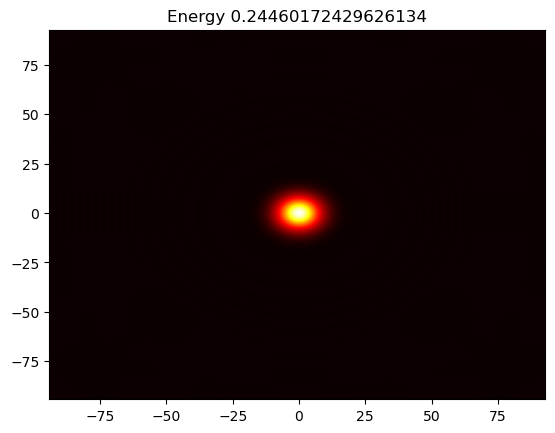

In [7]:
par = {'plot_step': 100, 'gradu': gradu}
dt = 0.01
end_time = 10
integrator = ETDRK4(T, L=LinearRHS, N=NonlinearRHS, update=update, image=None, **par)
#integrator = RK4(T, L=LinearRHS, N=NonlinearRHS, update=update, **par)
integrator.setup(dt)
U_hat = integrator.solve(U, U_hat, dt, (0, end_time))